In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [12]:
def read_jsonl_to_dataframe(filepath):
    """ Reads a JSON Lines file into a Pandas DataFrame."""
    try:
        df = pd.read_json(filepath, lines=True, convert_dates=False)
        return df
    except Exception as e:
        print(f"Error reading jsonl to dataframe: {e}")
        return None

In [13]:
food_data = "llm_output.json"

df = read_jsonl_to_dataframe(food_data)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [ ]:
df.shape
df.describe()
print(df.columns)
feature_lst = ['Cuisine', 'Happiness_Level', 'Meal_Course','Sugar', 'Salt', 'Healthy', 'Processing_level', 'Preparation_Method','Dominant_Color', 'Food_Diversity']

def chk_unique_val(df,feature_lst):
    for f in feature_lst:
        # print(f"feature name is {f} and unique values are :\n {df[f].unique()}")
        print(f"{f} Distribution:\n", df[f].value_counts())

Index(['name', 'size', 'date', 'Cuisine', 'Happiness_Level', 'Meal_Course',
       'Sugar', 'Salt', 'Healthy', 'Processing_level', 'Preparation_Method',
       'Dominant_Color', 'Food_Diversity'],
      dtype='object')


In [15]:
df[df['Cuisine'] == 'Unknown'].head(80)


,name,size,date,Cuisine,Happiness_Level,Meal_Course,Sugar,Salt,Healthy,Processing_level,Preparation_Method,Dominant_Color,Food_Diversity
3,Food/image(1).jpg,3282700,NaT,Unknown,4,Dessert,High,Low,Unhealthy,Processed,Baked,Brown,Low
9,Food/image(73).jpg,1802271,NaT,Unknown,4,Drink,Medium,Low,No,Processed,Unknown,White,Low
27,Food/image(12).jpg,1959360,NaT,Unknown,5,Dessert,High,Low,No,Processed,Unknown,Yellow,Low
37,Food/image(28).jpg,2065896,NaT,Unknown,4,Dessert,High,Low,No,Processed,Baked,Brown,Low
39,Food/image(86).jpg,2574581,NaT,Unknown,4,Drink,Low,Low,healthy,Minimally Processed,Unknown,Brown,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Food/PXL_20221227_074034334.jpg,2643230,2022-12-27,Unknown,4,Main Course,Medium,Low,healthy,Minimally Processed,Baked,Brown,Medium
296,Food/PXL_20250206_000102197.jpg,1495472,2025-02-06,Unknown,4,Drink,Medium,Low,Unknown,Processed,Unknown,White,Low
299,Food/image.jpg,4616107,NaT,Unknown,4,Snack,Low,Low,Yes,Unprocessed,Raw,Green,Low
301,Food/image(100).jpg,1791787,NaT,Unknown,4,Drink,Medium,Low,Balanced,Processed,Unknown,Brown,Low


#### DF processing to update Health feature

In [16]:
# 2 = Healthy, 1 = Balanced, 0 = 'Unhealthy'
health_value_map = {
    'healthy':2,
    'Balanced':1,
    'Unhealthy':0,
    'Unknown':1,
    'No':0,
    'balanced':1,
    'Yes':2,
    'unhealthy':0,
    'Healthy':2
}

gen_map = {
    'No':0,
    'Low':1,
    'Medium':2,
    'High':3
}

processing_map = {
    'Minimally Processed':1,
    'Processed':2,
    'Unprocessed':0
}


df_p = df.copy()
df_p['Healthy'] = df_p['Healthy'].map(health_value_map)
df_p['Salt'] = df_p['Salt'].map(gen_map)
df_p['Sugar'] = df_p['Sugar'].map(gen_map)
df_p['Food_Diversity'] = df_p['Food_Diversity'].map(gen_map)
df_p['Processing_level']= df_p['Processing_level'].map(processing_map)

df_p.sample(5)

,name,size,date,Cuisine,Happiness_Level,Meal_Course,Sugar,Salt,Healthy,Processing_level,Preparation_Method,Dominant_Color,Food_Diversity
303,Food/PXL_20250222_103641020.jpg,1880348,2025-02-22,Indian,4,Main Course,1,2,1,1,Fried,Brown,2
95,Food/image(79).jpg,1104268,NaT,Unknown,5,Drink,1,1,2,1,Unknown,Brown,1
194,Food/PXL_20240327_105121422.jpg,2647096,2024-03-27,Indian,4,Main Course,1,2,1,1,Steamed,Brown,2
292,Food/PXL_20240702_101356022.jpg,3072913,2024-07-02,Fusion,4,Main Course,1,2,2,1,"Baked, Steamed",Brown,3
223,Food/PXL_20240109_201344945.jpg,3173794,2024-01-09,Japanese,5,Dessert,3,1,0,2,Unknown,Pink,1


In [17]:
feature_lst = ['Cuisine', 'Happiness_Level', 'Meal_Course','Sugar', 'Salt', 'Healthy', 'Processing_level', 'Preparation_Method','Dominant_Color', 'Food_Diversity']

chk_unique_val(df_p, feature_lst)

feature name is Cuisine and unique values are :
 ['Fusion' 'Indian' 'Unknown' 'Italian' 'American' 'Chinese' 'German'
 'Japanese' 'Combination' 'Persian' 'Vietnamese' 'French' 'Thai' 'Mexican'
 'Turkish']
feature name is Happiness_Level and unique values are :
 [4 5 3 2]
feature name is Meal_Course and unique values are :
 ['Main Course' 'Dessert' 'Drink' 'Starter' 'Snack' 'Side Dish' 'Breakfast']
feature name is Sugar and unique values are :
 [1 3 2 0]
feature name is Salt and unique values are :
 [1 2 0]
feature name is Healthy and unique values are :
 [2 1 0]
feature name is Processing_level and unique values are :
 [1 2 0]
feature name is Preparation_Method and unique values are :
 ['Combination' 'Baked' 'Unknown' 'Fried' 'Boiled' 'Frozen' 'Steamed' 'Raw'
 'Baked, Steamed' 'Steamed, Baked' 'Steamed, Fried' 'Stir-fried'
 'Baked, Grilled, Raw' 'Steamed,Baked' 'Baked, Roasted' 'Raw, Steamed'
 'Baked, Grilled' 'Baked,Steamed' 'Minimally Processed' 'Baked, Fried'
 'Baked, Fried, Grilled

### What Cuisine is consumed more?

In [18]:
df_p['Cuisine'].value_counts()
df_p.loc[df_p['Cuisine']=='Combination','Cuisine']='Fusion'
df_p.loc[df_p['Cuisine']=='Unknown','Cuisine']='Fusion'
df_p['Cuisine'].value_counts()

# Of course it is Fusion 

Cuisine
Fusion        120
Indian         86
Italian        47
Thai           14
German         12
American        9
Japanese        7
Chinese         6
Mexican         5
French          2
Persian         1
Vietnamese      1
Turkish         1
Name: count, dtype: int64

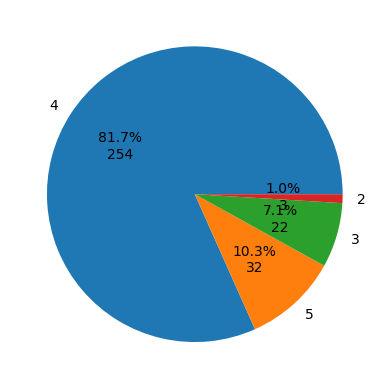

In [49]:
def plt_pie(df_p, f):
    total = df_p[f].value_counts().values.sum()
    def perc_cal(s):
        return '{:.1f}%\n{:.0f}'.format(s, total*s/100)
    df_p_cuisine = df_p[f].value_counts()
    plt.pie(df_p_cuisine.values, labels=df_p_cuisine.index, autopct=perc_cal)
    plt.show()

# plt_pie(df_p, 'Sugar')
# plt_pie(df_p, 'Salt')
plt_pie(df_p, 'Happiness_Level')

In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
only_numerics = df_p.select_dtypes(include=numerics)
only_numerics.columns

Index(['size', 'Happiness_Level', 'Sugar', 'Salt', 'Healthy',
       'Processing_level', 'Food_Diversity'],
      dtype='object')

In [58]:
only_numerics = only_numerics[['Happiness_Level', 'Sugar', 'Salt', 'Healthy','Processing_level', 'Food_Diversity']]
only_numerics.corr()


,Happiness_Level,Sugar,Salt,Healthy,Processing_level,Food_Diversity
Happiness_Level,1.000000,0.290237,-0.037341,-0.029132,0.108371,0.093414
Sugar,0.290237,1.000000,-0.551170,-0.514042,0.664263,-0.306616
Salt,-0.037341,-0.551170,1.000000,0.096176,-0.331087,0.432985
Healthy,-0.029132,-0.514042,0.096176,1.000000,-0.618172,0.260545
Processing_level,0.108371,0.664263,-0.331087,-0.618172,1.000000,-0.302990
Food_Diversity,0.093414,-0.306616,0.432985,0.260545,-0.302990,1.000000


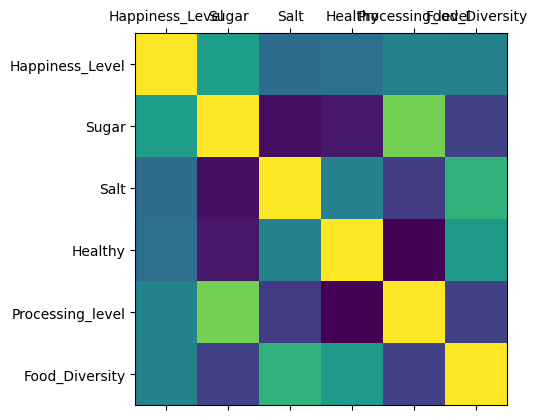

In [59]:
plt.matshow(only_numerics.corr())
plt.xticks(range(0,6),only_numerics.columns)
plt.yticks(range(0,6),only_numerics.columns)
plt.show()

<Axes: xlabel='Cuisine', ylabel='Happiness_Level'>

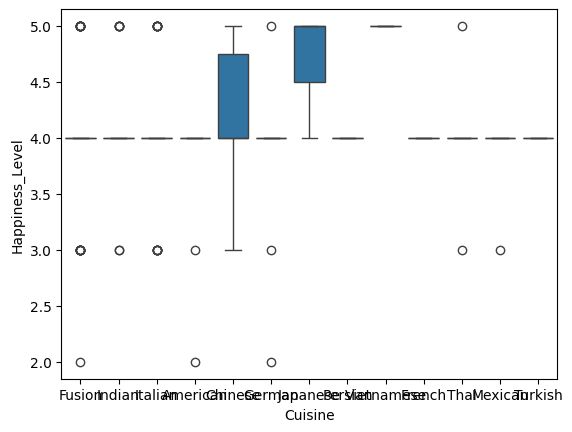

In [60]:
sns.boxplot(x = 'Cuisine', y = 'Happiness_Level', data = df_p)

<Axes: xlabel='Happiness_Level', ylabel='Sugar'>

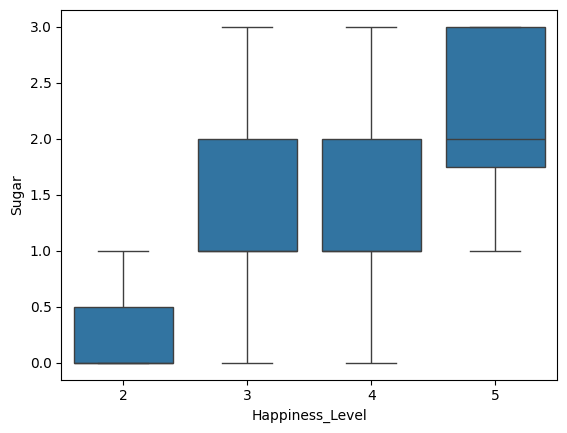

In [62]:
sns.boxplot(x = 'Happiness_Level', y = 'Sugar', data = df_p)

<Axes: xlabel='Healthy', ylabel='Cuisine'>

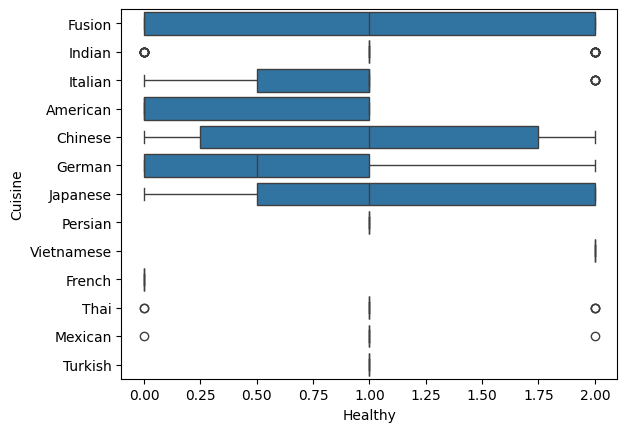

In [67]:
# 'Healthy','Processing_level', 'Food_Diversity'
sns.boxplot(x = 'Healthy', y = 'Cuisine', data = df_p)